# FTE - Metropolitan Police crime data (2010 - 2016)

** Objectives:**
* Generate FiveThirtyEight graphs for my [UK crime data vis](https://github.com/PukkaPad/UK-crime-data-visualization-statistics) project. 



In [1]:
import pandas as pd
import os
import glob
from collections import Counter
import matplotlib.style as style

cwd = os.getcwd()
#path = "../data/crime_data/"

%matplotlib inline

style.use('fivethirtyeight')

In [2]:
def loadData(path):
    """
    Takes csv files with the following columns: Crime ID, Month, Reported by, Falls within, Longitude, Latitude, Location, LSOA code, LSOA name, Crime type, Last outcome category, Context
    This file will be turned into a DataFrame.
    Args:
        Data path
    Returns:
        Pandas DataFrame.
    """

    all_files = glob.glob(os.path.join(path, "*.csv"))
    frame = pd.DataFrame()
    list_ = []

    for file_ in all_files:
        df = pd.read_csv (file_)
        # print "reading ", file_
        list_.append(df)
    frame = pd.concat(list_)

    frame['Time'] = pd.to_datetime(frame['Month'], format = '%Y-%m')
    #frame['Time'] = frame['Time'].dt.strftime('%Y-%m')
    return frame

In [3]:
def counter_df():
    """
    Takes a data frame and returns a counter object
    Args:
        None
    Returns:
        A python dictionary with key and values, example: Counter({'Anti-social behaviour': 34463, 'Other crime': 28114, 'Violent crime': 11784, 'Burglary': 7897, 'Vehicle crime': 7393, 'Robbery': 2791})
    """

    x = loadData(r'../data/crime_data/')
    counter = Counter(x['Crime type'])
    return counter

In [4]:
def pivot_df():
    """
    Takes a data frame and returns a pivot DataFrame.
    Args:
        None
    Returns:
        Pandas DataFrame formatted as a pivot table. Example: Time Crime type  Anti-social behaviour  Burglary  Other crime  Robbery
    """

    x = loadData(r'../data/crime_data/')
    groupedFrame = x.groupby(['Time', 'Crime type']).size().reset_index(name='Frequency')
    df = pd.DataFrame(groupedFrame)
    #return df
    pivot_df = df.pivot_table('Frequency', ['Time'], 'Crime type')
    return pivot_df

In [5]:
counter_df()

Counter({'Anti-social behaviour': 1809055,
         'Bicycle theft': 66777,
         'Burglary': 501549,
         'Criminal damage and arson': 320301,
         'Drugs': 226110,
         'Other crime': 412067,
         'Other theft': 722856,
         'Possession of weapons': 13913,
         'Public disorder and weapons': 50433,
         'Public order': 142115,
         'Robbery': 174163,
         'Shoplifting': 215945,
         'Theft from the person': 133502,
         'Vehicle crime': 548268,
         'Violence and sexual offences': 662655,
         'Violent crime': 339718})

# Check the data

In [6]:
All_Crime = pivot_df().reset_index()
All_Crime = All_Crime.rename_axis(None, axis=1)

In [7]:
All_Crime.head(3)

,Time,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public disorder and weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Violent crime
0,2010-12-01,34463.0,NaN,7897.0,NaN,NaN,28114.0,NaN,NaN,NaN,NaN,2791.0,NaN,NaN,7393.0,NaN,11784.0
1,2011-01-01,33554.0,NaN,9023.0,NaN,NaN,32578.0,NaN,NaN,NaN,NaN,3254.0,NaN,NaN,8158.0,NaN,12532.0
2,2011-02-01,32085.0,NaN,7778.0,NaN,NaN,31819.0,NaN,NaN,NaN,NaN,3113.0,NaN,NaN,7532.0,NaN,11852.0


In [8]:
print All_Crime.index.name

None


In [9]:
All_Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
Time                            73 non-null datetime64[ns]
Anti-social behaviour           73 non-null float64
Bicycle theft                   44 non-null float64
Burglary                        73 non-null float64
Criminal damage and arson       64 non-null float64
Drugs                           64 non-null float64
Other crime                     73 non-null float64
Other theft                     64 non-null float64
Possession of weapons           44 non-null float64
Public disorder and weapons     20 non-null float64
Public order                    44 non-null float64
Robbery                         73 non-null float64
Shoplifting                     64 non-null float64
Theft from the person           44 non-null float64
Vehicle crime                   73 non-null float64
Violence and sexual offences    44 non-null float64
Violent crime                   29 non-null float64
dtypes

In [10]:
# some NaN

# Visualization

In [11]:
# Colorblind-friendly colors
colours = [(0.0,0.0,0.0), (230.0/255,159.0/255,0.0), (86.0/255,180.0/255.0,233.0/255), (0.0,158.0/255,115.0/255), 
          (213.0/255,94.0/255,0.0), (0.0,114.0/255,178.0/255), (204.0/255, 121.0/255, 167.0/255)]

### 1) With the data as-is

In [12]:
# I will select the first row (Dec-2012)
# I will select only non null fields

In [13]:
non_null = All_Crime.loc[0, (All_Crime.loc[0].notnull())]

In [14]:
non_null

Time                     2010-12-01 00:00:00
Anti-social behaviour                  34463
Burglary                                7897
Other crime                            28114
Robbery                                 2791
Vehicle crime                           7393
Violent crime                          11784
Name: 0, dtype: object

In [15]:
non_null = non_null.drop('Time')
non_null

Anti-social behaviour    34463
Burglary                  7897
Other crime              28114
Robbery                   2791
Vehicle crime             7393
Violent crime            11784
Name: 0, dtype: object

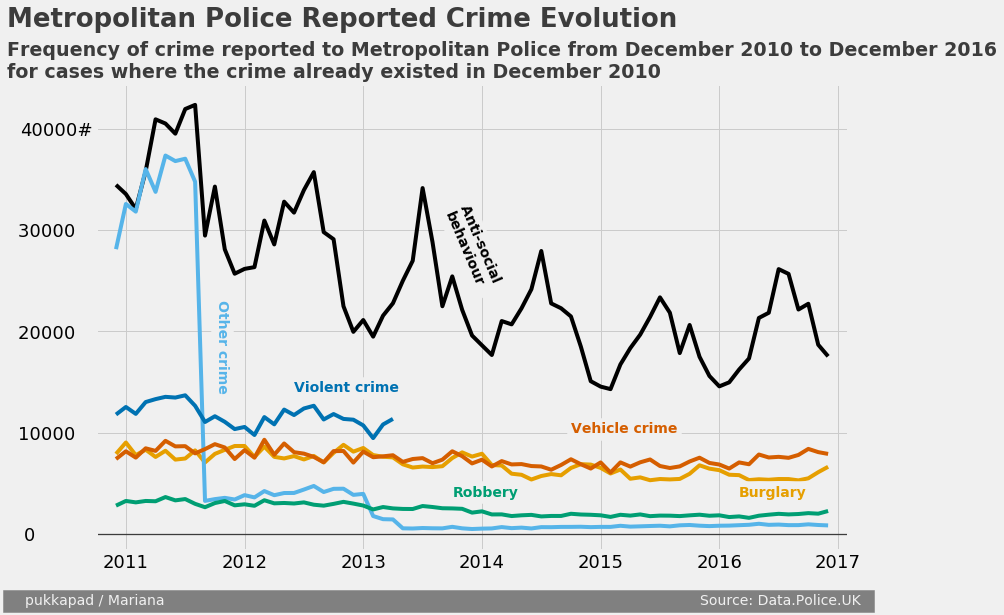

In [107]:
non_null_graph = All_Crime.plot(x = 'Time', y = non_null.index, figsize = (12,8), color = colours, legend = False)
non_null_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)

non_null_graph.set_yticklabels(labels = [-100000, '0          ', '10000   ', '20000   ', '30000   ', '40000#'])

non_null_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = 0.7)

# x limits
non_null_graph.set_xlim(pd.Timestamp('2010-10'),pd.Timestamp('2017-02'))

non_null_graph.xaxis.label.set_visible(False)

# Signature bar
non_null_graph.text(x = '2010', y = -7000, 
            s = '    pukkapad / Mariana                                                                                                                       Source: Data.Police.UK  '   ,
           fontsize = 14, color = '#f0f0f0',  backgroundcolor = 'grey')


# Title and subtile
non_null_graph.text(x = '2010', y = 50050,
           s = "Metropolitan Police Reported Crime Evolution",
           fontsize = 26, weight = 'bold', alpha = 0.75)

non_null_graph.text(x = '2010', y = 45000,
           s = "Frequency of crime reported to Metropolitan Police from December 2010 to December 2016\nfor cases where the crime already existed in December 2010", 
            fontsize = 19, weight = 'bold', alpha = 0.75)

# Add labels
non_null_graph.text(x = '2013-09', y = 30000, s = 'Anti-social \nbehaviour', color = colours[0], weight = 'bold', rotation = -67,
             backgroundcolor = '#f0f0f0')
non_null_graph.text(x = '2016-03', y = 3700, s = 'Burglary', color = colours[1], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
non_null_graph.text(x = '2011-10', y = 22000, s = 'Other crime', color = colours[2], weight = 'bold', rotation = -90, 
               backgroundcolor = '#f0f0f0')
non_null_graph.text(x = '2013-10', y = 3700, s = 'Robbery', color = colours[3], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
non_null_graph.text(x = '2014-10', y = 10000, s = 'Vehicle crime', color = colours[4], weight = 'bold',
              backgroundcolor = '#f0f0f0')
non_null_graph.text(x = '2012-06', y = 14000, s = 'Violent crime', color = colours[5], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')


### 2) Replacing NaN with mean